## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [41]:
df = pd.read_csv('data/train.csv')

#### Show Top 5 Records

In [42]:
# Show all rows in output
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [43]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Preparing X and Y variables

In [89]:
Id= df['Id']
X = df.drop(columns=['Id','SalePrice'],axis=1)
y= df['SalePrice']

In [90]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [91]:
X['MSSubClass'] = X['MSSubClass'].astype('str') # Since MSSubClass is a categorical variable, we convert it to string type
X['age']=X['YrSold']-X['YearBuilt'] #calculate age of the house
X['age_mod']=X['YearRemodAdd']-X['YearBuilt'] #calculate age of the house before remodeling
X['garage_age']=X['YrSold']-X['GarageYrBlt'] #calculate age of the garage
X.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True) #remove the columns that are not needed anymore

In [92]:
# Fill missing values with 0
X[['LotFrontage', 'MasVnrArea', 'garage_age']] = X[['LotFrontage', 'MasVnrArea', 'garage_age']].fillna(0)

In [93]:
# Drop columns with high percentage of missing values & not useful for prediction
X.drop([ 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True) 

In [94]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# ✅ Numeric Transformer
num_transformer = StandardScaler()

# ✅ Categorical Transformer
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# ✅ Final Preprocessor
preprocessor = ColumnTransformer([
    ("cats", cat_transformer, cat_features),
    ("nums", num_transformer, num_features),
])

In [95]:
X = preprocessor.fit_transform(X)

In [97]:
np.isnan(X).sum()

np.int64(0)

In [98]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1168, 303), (292, 303))

#### Create an Evaluate Function to give all metrics after model Training

In [99]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [55]:
import time
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]
st=time.time()
for i in range(len(list(models))):
    model = list(models.values())[i]
    print(f"Training {list(models.keys())[i]}...")
    model.fit(X_train, y_train) # Train model
    print(f"Training completed for {list(models.keys())[i]}. and it took {time.time() - st:.2f} seconds")
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Training Linear Regression...
Training completed for Linear Regression. and it took 0.33 seconds
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 19337.7042
- Mean Absolute Error: 12624.1577
- R2 Score: 0.9373
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29474.7966
- Mean Absolute Error: 18410.0822
- R2 Score: 0.8867


Training Lasso...


d:\MiniConda\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.527e+10, tolerance: 6.967e+08
  model = cd_fast.sparse_enet_coordinate_descent(


Training completed for Lasso. and it took 0.76 seconds
Lasso
Model performance for Training set
- Root Mean Squared Error: 19343.1648
- Mean Absolute Error: 12628.8722
- R2 Score: 0.9373
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 28407.1718
- Mean Absolute Error: 18037.4700
- R2 Score: 0.8948


Training Ridge...
Training completed for Ridge. and it took 0.79 seconds
Ridge
Model performance for Training set
- Root Mean Squared Error: 21231.4980
- Mean Absolute Error: 13788.2829
- R2 Score: 0.9244
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 29689.6903
- Mean Absolute Error: 19008.7186
- R2 Score: 0.8851


Training K-Neighbors Regressor...
Training completed for K-Neighbors Regressor. and it took 0.80 seconds
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 31233.2619
- Mean Absolute Error: 17713.2015
- R2 Score: 0.8364
----------------------------------
Mo

### Results

In [56]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.911485
7,CatBoosting Regressor,0.911047
1,Lasso,0.894794
5,Random Forest Regressor,0.888217
0,Linear Regression,0.886737
2,Ridge,0.885080
8,AdaBoost Regressor,0.831136
3,K-Neighbors Regressor,0.811467
4,Decision Tree,0.754801


## Linear Regression

In [28]:
cat_model = CatBoostRegressor(verbose=False)
cat_model = cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 91.11


## Plot y_pred and y_test

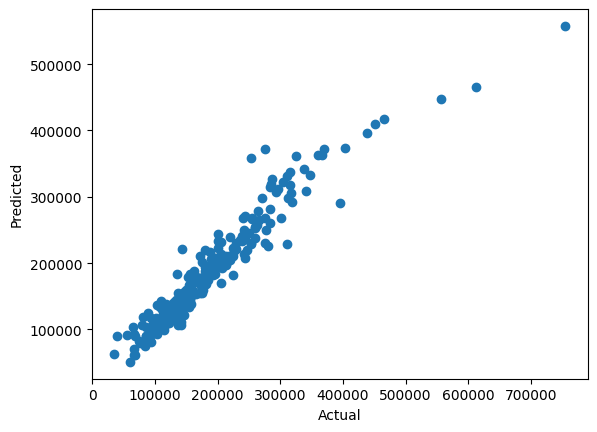

In [29]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

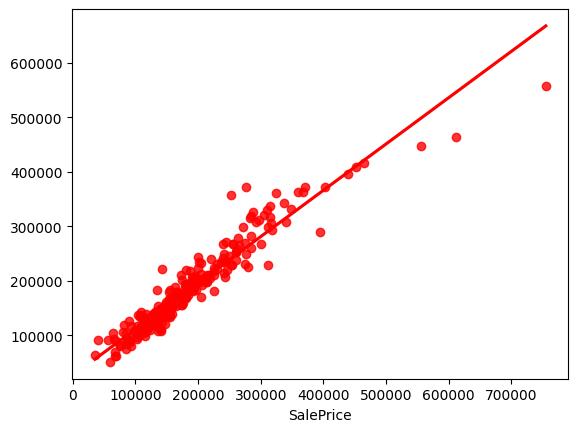

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

In [85]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for CatBoostRegressor
catboost_params = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'iterations': [200, 500, 1000],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 1, 2, 3]
}

cat_model = CatBoostRegressor(verbose=False, random_state=42)
cat_search = RandomizedSearchCV(
    cat_model,
    catboost_params,
    n_iter=20,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

cat_search.fit(X_train, y_train)
print("Best parameters:", cat_search.best_params_)
print("Best R2 score:", cat_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'learning_rate': 0.05, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 6, 'bagging_temperature': 2}
Best R2 score: 0.8883498867110386


In [77]:
import optuna

def objective(trial):
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 300, 500, 1000]),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.3),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 3),
        'random_state': 42,
        'n_jobs': -1,
    }
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return r2_score(y_test, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best parameters:", study.best_params)
print("Best R2 score:", study.best_value)


[I 2025-06-22 16:20:18,383] A new study created in memory with name: no-name-82c4fb60-2d4b-4ac4-8a79-fc671c887c8d
[I 2025-06-22 16:20:19,363] Trial 0 finished with value: 0.9003406167030334 and parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.03958175493965899, 'subsample': 0.8627450637856842, 'colsample_bytree': 0.9582332087869585, 'gamma': 0.2692435231879951, 'reg_alpha': 0.10199742341336249, 'reg_lambda': 2.970668305220033}. Best is trial 0 with value: 0.9003406167030334.
[I 2025-06-22 16:20:26,002] Trial 1 finished with value: 0.9205403923988342 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.06990446482230404, 'subsample': 0.7319664059256599, 'colsample_bytree': 0.8656544676088371, 'gamma': 0.173199890410886, 'reg_alpha': 0.8465332264029652, 'reg_lambda': 2.900484538575002}. Best is trial 1 with value: 0.9205403923988342.
[I 2025-06-22 16:20:26,963] Trial 2 finished with value: 0.8242504000663757 and parameters: {'n_estimators': 100,

Best parameters: {'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.03589579055272508, 'subsample': 0.6565557325240888, 'colsample_bytree': 0.6084965672774986, 'gamma': 0.1292947427863605, 'reg_alpha': 0.5302735916870123, 'reg_lambda': 1.159893202050106}
Best R2 score: 0.9343270063400269


In [78]:
bestestimator = XGBRegressor(**study.best_params)
bestestimator.fit(X_train, y_train)
y_pred = bestestimator.predict(X_test)
# Evaluate the best model
mae, rmse, r2 = evaluate_model(y_test, y_pred)
print(f"Best XGB regressor on test set:\n- MAE: {mae:.2f}\n- RMSE: {rmse:.2f}\n- R2: {r2:.4f}")

Best XGB regressor on test set:
- MAE: 14297.08
- RMSE: 23091.72
- R2: 0.9305


In [111]:
test_df = pd.read_csv('data/test.csv')
# Preprocess the test data similarly to the training data
test_df['MSSubClass'] = test_df['MSSubClass'].astype('str')
test_df['age'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['age_mod'] = test_df['YearRemodAdd'] - test_df['YearBuilt']
test_df['garage_age'] = test_df['YrSold'] - test_df['GarageYrBlt']
test_df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)
test_df[['LotFrontage', 'MasVnrArea', 'garage_age']] = test_df[['LotFrontage', 'MasVnrArea', 'garage_age']].fillna(0)
test_df.drop(['MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

In [112]:
X_test_new =preprocessor.transform(test_df.drop(columns=['Id'],axis=1))

In [114]:
feature_names = preprocessor.get_feature_names_out()

In [113]:
np.isnan(X_test_new).sum()

np.int64(10)

In [115]:
X_test_df = pd.DataFrame(X_test_new, columns=feature_names)

In [117]:
X_test_df.isnull().sum().sort_values(ascending=False)

nums__BsmtFullBath             2
nums__BsmtHalfBath             2
nums__BsmtFinSF1               1
nums__BsmtFinSF2               1
nums__BsmtUnfSF                1
nums__TotalBsmtSF              1
nums__GarageCars               1
nums__GarageArea               1
cats__MSSubClass_45            0
cats__MSSubClass_50            0
cats__MSSubClass_60            0
cats__MSSubClass_70            0
cats__MSSubClass_75            0
cats__MSSubClass_80            0
cats__MSSubClass_85            0
cats__MSSubClass_90            0
nums__OverallQual              0
cats__Utilities_AllPub         0
nums__KitchenAbvGr             0
nums__BedroomAbvGr             0
cats__MSZoning_C (all)         0
cats__MSSubClass_190           0
nums__OverallCond              0
nums__MasVnrArea               0
nums__1stFlrSF                 0
nums__2ndFlrSF                 0
nums__LowQualFinSF             0
nums__GrLivArea                0
nums__FullBath                 0
nums__HalfBath                 0
cats__MSSu

In [ ]:
X_test_df

In [104]:
y_pred_xgb = bestestimator.predict(X_test_new)

In [105]:
y_pred_cat=cat_search.best_estimator_.predict(X_test_new)

In [118]:
cat_best= cat_search.best_estimator_
cat_best.fit(X,y)
y_pred_cat=cat_search.best_estimator_.predict(X_test_new)

In [119]:
xgb_best=bestestimator
xgb_best.fit(X,y)
y_pred_xgb = xgb_best.predict(X_test_new)

In [ ]:
submission_df = pd.DataFrame({
    'Id': test_df['Id'],'SalePrice': y_pred_xgb})
submission_df.to_csv('submission.csv', index=False)

In [120]:
#ensemble predictions
submission_df = pd.DataFrame({
    'Id': test_df['Id'],'SalePrice': (y_pred_xgb+ y_pred_cat)/2})
submission_df.to_csv('submission.csv', index=False)

In [100]:
import optuna

def lasso_objective(trial):
    alpha = trial.suggest_float('alpha', 1e-4, 10, log=True)
    max_iter = trial.suggest_categorical('max_iter', [1000, 5000, 10000])
    model = Lasso(alpha=alpha, max_iter=max_iter, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return r2_score(y_test, preds)

lasso_study = optuna.create_study(direction='maximize')
lasso_study.optimize(lasso_objective, n_trials=50)

print("Best parameters:", lasso_study.best_params)
print("Best R2 score:", lasso_study.best_value)


[I 2025-06-22 17:14:39,401] A new study created in memory with name: no-name-7a036c82-f128-4d9d-b7ea-2b84fedc0132
d:\MiniConda\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.242e+09, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
[I 2025-06-22 17:14:39,733] Trial 0 finished with value: 0.9004132714170028 and parameters: {'alpha': 7.32711707118323, 'max_iter': 1000}. Best is trial 0 with value: 0.9004132714170028.
d:\MiniConda\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.388e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descen

Best parameters: {'alpha': 7.32711707118323, 'max_iter': 1000}
Best R2 score: 0.9004132714170028


In [ ]:
# Retrain Lasso with best parameters from Optuna
best_lasso = Lasso(**lasso_study.best_params, random_state=42)
best_lasso.fit(X,y)
y_pred_lasso = best_lasso.predict(X_test_new)

d:\MiniConda\envs\myenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.242e+09, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


ValueError: Input X contains NaN.
Lasso does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [107]:
#ensemble predictions
submission_df = pd.DataFrame({
    'Id': test_df['Id'],'SalePrice': (y_pred_xgb+ y_pred_cat+y_pred_lasso)/3})
submission_df.to_csv('submission.csv', index=False)